# Resampling Datetime Data (Core)

* Part 1: Load the data and create a datetime index

* Part 2: Answer 2 Questions using visualizations and the correct frequency data

In [951]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

## Working with Time Series 

   * Weather data from London 
   * Source: Kaggle

In [911]:
# load the data
weather_df = pd.read_csv('london_weather_MODIFIED.csv')
 
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [912]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Preparing the Datetime Index

In [913]:
#Add a datetime column based on the string in the "date" column
#weather_df['datetime'] = pd.to_datetime(weather_df['date'])
#weather_df.info()
#weather_df.head(3)

# convert column to new column of datetime objects
weather_df['datetime'] = pd.to_datetime(weather_df['date'])

# check
print(weather_df['datetime'].dtype)
weather_df['datetime'].head()

datetime64[ns]


0   1970-01-01 00:00:00.019790101
1   1970-01-01 00:00:00.019790102
2   1970-01-01 00:00:00.019790103
3   1970-01-01 00:00:00.019790104
4   1970-01-01 00:00:00.019790105
Name: datetime, dtype: datetime64[ns]

In [914]:
## Investigate the date format
#weather_df.loc[0,'date']

In [915]:
#weather_df.loc[0,'datetime']

In [916]:
#weather_df['datetime'].head

In [917]:
## Set the date format
#fmt = '%Y/%m/%d'

In [918]:
# correct the formatting
weather_df['datetime'] = pd.to_datetime(weather_df['date'], format='%Y%m%d')

# check
print(weather_df['datetime'].dtype)
weather_df['datetime'].head()

datetime64[ns]


0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [919]:
# drop date column
weather_df = weather_df.drop(columns = ['date'])

In [920]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cloud_cover       14938 non-null  float64       
 1   sunshine          14957 non-null  float64       
 2   global_radiation  14939 non-null  float64       
 3   max_temp          14951 non-null  float64       
 4   mean_temp         14922 non-null  float64       
 5   min_temp          14955 non-null  float64       
 6   precipitation     14951 non-null  float64       
 7   pressure          14953 non-null  float64       
 8   snow_depth        13589 non-null  float64       
 9   datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


## Setting Index

In [921]:
weather_df = weather_df.set_index('datetime')
weather_df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [922]:
# check the index to confirm its datetime
weather_df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

In [923]:
# check columns
weather_df.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

## Filtering data

In [924]:
filtered_weather_df = weather_df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

filtered_weather_df.head()
#weather_df['precipitation'].head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00


In [925]:
#checking for missing values
filtered_weather_df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [926]:
filtered_weather_df['precipitation'] = pd.to_datetime(filtered_weather_df['precipitation'], errors='coerce')
filtered_weather_df['precipitation'].isna().sum()

390

In [927]:
# imputing missing values using interpolate
filtered_weather_df['mean_temp'] = filtered_weather_df['mean_temp'].interpolate()
filtered_weather_df['min_temp'] = filtered_weather_df['min_temp'].interpolate()
filtered_weather_df['max_temp'] = filtered_weather_df['max_temp'].interpolate()

#imputing missing values using forwardfill since value is 0
filtered_weather_df['snow_depth'] = filtered_weather_df['snow_depth'].fillna(method='ffill')
filtered_weather_df['precipitation'] = filtered_weather_df['precipitation'].fillna(method='ffill')

# check
filtered_weather_df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Q1: What month had the most precipitation between 2000 through 2010?


In [928]:
ts = weather_df['precipitation'].copy()
ts.head()

datetime
1979-01-01   0.40
1979-01-02   0.00
1979-01-03   0.00
1979-01-04   0.00
1979-01-05   0.00
Name: precipitation, dtype: float64

In [929]:
prec = weather_df.loc['2000':'2010', ['precipitation']]

prec.head()

,precipitation
datetime,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80


In [930]:
date = prec['precipitation'].idxmax()
max_prec = prec['precipitation'].max()


print(f"The most precipitation of {max_prec} inches occured on {date.strftime('%B, %Y')} which was a {date.day_name()}.")

The most precipitation of 36.6 inches occured on October, 2000 which was a Sunday.


## Visualization

In [931]:
plot_df = prec
#plot_df = weather_df.loc['2000':'2010','precipitation']
plot_df


,precipitation
datetime,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80
...,...
2010-12-27,5.00
2010-12-28,0.40
2010-12-29,1.40


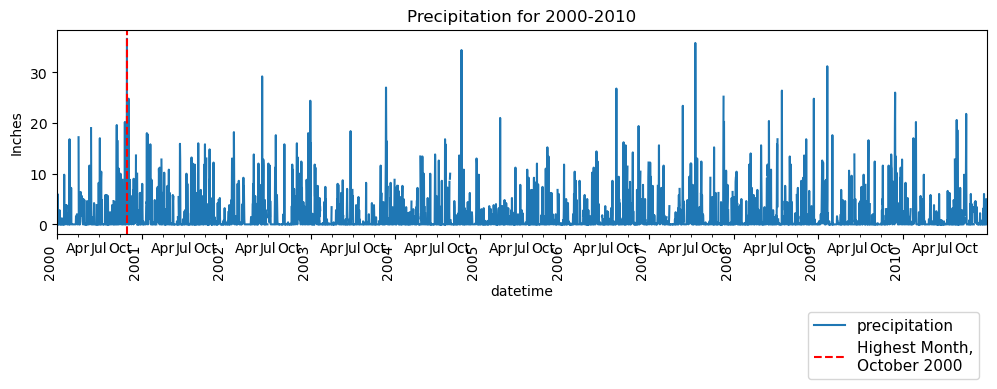

In [932]:

## Plot the data
ax = plot_df.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

# add vertical line at max_precip_date
ax.axvline(x = date, 
          color = 'r', 
          linestyle = '--',
          label = f'Highest Month,\n{date:%B %Y}')


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

#add legend

ax.legend(loc = 'lower right',
          bbox_to_anchor = (1.0, -.75),
          prop = {'size': 11});

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [993]:
temp = weather_df.loc['2000':'2020', ['mean_temp', 'min_temp','max_temp']]

temp.head()

,mean_temp,min_temp,max_temp
datetime,,,
2000-01-01,7.00,4.90,10.80
2000-01-02,7.90,5.00,11.50
2000-01-03,9.40,7.20,9.50
2000-01-04,7.00,4.40,11.00
2000-01-05,6.40,1.90,10.80


In [994]:
# Resample the data as yearly frequency
#temps = temp.resample("M").sum()
#temps

In [995]:
temps.isna().sum()

mean_temp    0
min_temp     0
max_temp     0
dtype: int64

In [1014]:
# Resample the data as yearly frequency
temp_yearly = temp.resample("Y").mean()
temp_yearly.name = 'Resampled'
temp_yearly.head

<bound method NDFrame.head of             mean_temp  min_temp  max_temp
datetime                                 
2000-12-31      11.53      7.97     15.11
2001-12-31      11.31      7.64     14.97
2002-12-31      12.01      8.35     15.73
2003-12-31      12.23      7.99     16.49
2004-12-31      11.87      8.21     15.51
2005-12-31      11.88      8.03     15.73
2006-12-31      12.39      8.52     16.17
2007-12-31      12.06      8.22     15.94
2008-12-31      11.17      7.45     15.03
2009-12-31      11.72      7.72     15.65
2010-12-31      10.65      6.76     14.49
2011-12-31      12.47      8.43     16.52
2012-12-31      11.32      7.38     15.25
2013-12-31      11.20      7.40     14.99
2014-12-31      12.61      8.61     16.57
2015-12-31      12.09      8.14     16.00
2016-12-31      11.89      7.92     15.87
2017-12-31      12.24      8.35     16.08
2018-12-31      12.44      8.28     16.62
2019-12-31      12.23      7.94     16.49
2020-12-31      12.72      8.71     16.81>

In [1028]:
date_min_temp = temp_yearly['min_temp'].idxmin()
min_temp = temp_yearly['min_temp'].min()

print(f"The coolest temperature of {min_temp} degrees in average occured in {date_min_temp.strftime('%Y')}.")
      #which was a {date_min_temp.day_name()}.")


The coolest temperature of 6.764723032069972 degrees in average occured in 2010.


In [1030]:
min_temp = temp_yearly['min_temp'].min()
min_temp

6.764723032069972

## Visualization

In [1031]:
temp_cols = ['mean_temp','min_temp','max_temp']
plot_df2 = temp.loc['2000':'2020',temp_cols]
plot_df2
#.loc['2000':'2020',temp_cols]

,mean_temp,min_temp,max_temp
datetime,,,
2000-01-01,7.00,4.90,10.80
2000-01-02,7.90,5.00,11.50
2000-01-03,9.40,7.20,9.50
2000-01-04,7.00,4.40,11.00
2000-01-05,6.40,1.90,10.80
...,...,...,...
2020-12-27,7.50,7.60,7.50
2020-12-28,1.10,-1.30,3.60
2020-12-29,2.60,1.10,4.10


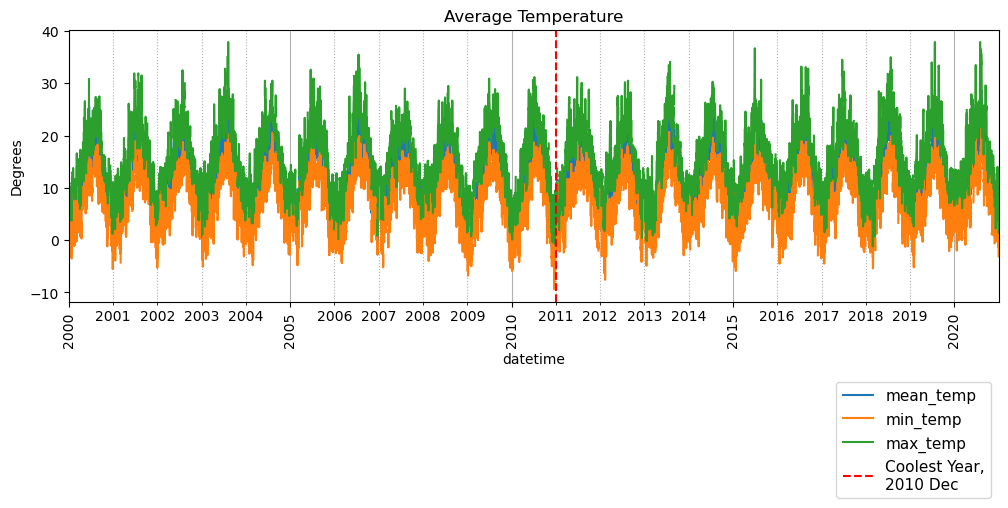

In [1035]:
## Make the fig and axis first

fig, ax = plt.subplots(figsize=(12,4))


# plot the time series with pandas
plot_df2.plot(ax=ax,title='Average Temperature',ylabel='Degrees')

## customize minor ticks
ax.xaxis.set_minor_locator(loc_1year)
ax.xaxis.set_minor_formatter(fmt_year)

## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x')
fig.autofmt_xdate(rotation=90,ha='center')


# add vertical line at max_precip_date
ax.axvline(x = date_min_temp, 
          color = 'r', 
          linestyle = '--',
          label = f'Coolest Year,\n{date_min_temp:%Y %b}')

#add legend

ax.legend(loc = 'lower right',
          bbox_to_anchor = (1.0, -.75),
          prop = {'size': 11});


## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every year.
loc_1year = mdates.YearLocator(1)
fmt_year = mdates.DateFormatter("%Y")
## for major year ticks
loc_year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")
